# Homework 1 Deep Learning

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data1 = np.load('hw1_p1.npy')
data2 = np.load('hw1_p2.npy')
data3 = np.load('hw1_p3.npy')
data3_gt = np.load('hw1_p3_gt.npy')

### Problem 1 Gradient Descent and Convergence Rate


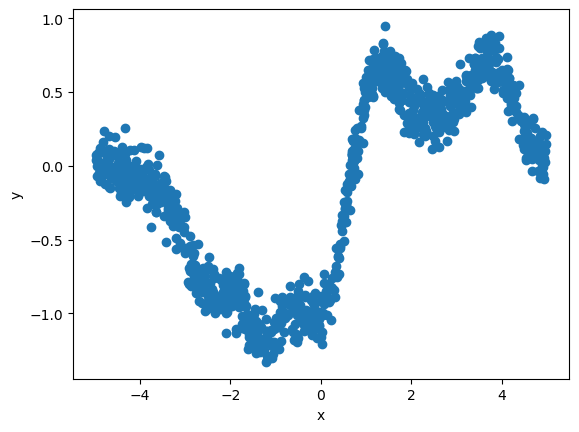

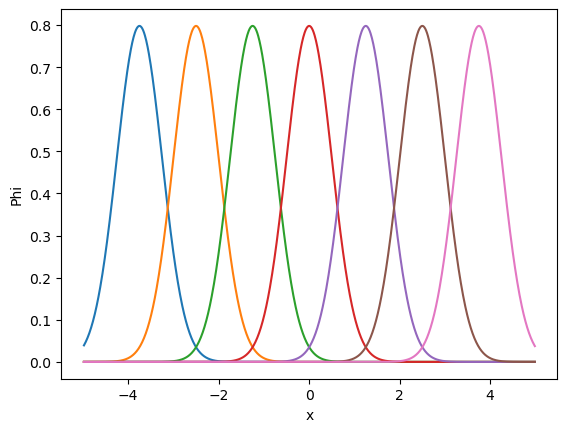

In [164]:
# Visualization
x = np.linspace(np.min(data1[:,0]), np.max(data1[:,0]), data1.shape[0])
sigma = np.sqrt(0.25)
mu = []
phi = []

for m in range(7):
    mu.append(1.25 * m - 3.75)
    phi.append(norm.pdf(x, mu[m], sigma))

phi = np.array(phi)

# plot data
plt.plot(data1[:,0], data1[:,1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i in range(7):
    plt.plot(x, phi[i])
plt.xlabel('x')
plt.ylabel('Phi')
plt.show()


1. Write down the gradient descent updates for this problem, with learning rate ϵ.

In [218]:
def gradient_update(Phi, w, y, learning_rate):
    
    gradient = np.matmul(Phi, Phi.T).dot(w) - Phi.dot(y)
    
    w_new = w - learning_rate * gradient 
    
    return w_new, gradient

2. Derive the theoretical upper bound for ϵ that ensures convergence.

learning rate 0 < ϵ < 2/lambda_max



3. Use the data, calculate the eigenvalues of the Hessian matrix and provide the numerical **upper** bound of ϵ for this problem.

In [227]:
x = data1[:, 0]
y = data1[:, 1]

M = 7
N = x.shape[0]
Phi = np.zeros([M,N])

for m in range(7):
    mu = 1.25*m - 3.75
    sigma = np.sqrt(0.25)
    Phi[m,:] = norm.pdf(x, mu, sigma)

H = Phi.T.dot(Phi)
eigvals = np.linalg.eigvals(H)
lamda_max = max(eigvals)

learning_rate_max = 2 / lamda_max

print(f'The upper bound of the learning rate is ', learning_rate_max)

The upper bound of the learning rate is  (0.02511384093634769+0j)


4. Set ϵ = 1/λmax, where λmax is the maximum eigenvalue of the Hessian matrix. Run the gradient descent updates for 1000 steps, and log the loss value as well as the normsquared of the gradient as a function of number of steps. Provide the following two plots as part of your write-up:

  
  (1) Loss as a function of number of iterations

  (2) The logarithm of norm-squared of the loss compared with the logarithm of the convergence upper bound


In [269]:
learning_rate = (1/lamda_max).real
n_iteration = 1000

w = np.zeros([7,1])
losses = np.zeros(1000)
norm_squared_gradient = np.zeros(1000)  # Assuming 1000 iterations
norm_squared_gradient_uppder = np.zeros(1000)  # Assuming 1000 iterations


y = y.reshape(-1, 1)
for t in range(n_iteration):
    # Gradient updates
    w_update, gradient = gradient_update(Phi, w, y, learning_rate)
    w = w_update
    
    # Loss
    error = np.matmul(Phi.T, w) - y
    loss = 0.5* (error**2)[:,0].sum()
    losses[t] = loss
        
    # norm_squared gradient
    norm_squared_gradient[t] = (gradient*gradient)[:, 0].sum() 
    norm_squared_gradient_uppder[t] = 2*lamda_max*(losses[0] - losses[-1])/(t+1)
    
    
# Log the loss, norm-squared gradient and the upper bound
log_loss = np.log(losses + 1e-5)
log_norm_squared_gradient = np.log(norm_squared_gradient + 1e-5)
log_norm_squared_gradient_upper = np.log(norm_squared_gradient_uppder + 1e-5)

C:\Users\vicky\AppData\Local\Temp\ipykernel_26952\1351383478.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_squared_gradient_uppder[t] = 2*lamda_max*(losses[0] - losses[-1])/(t+1)


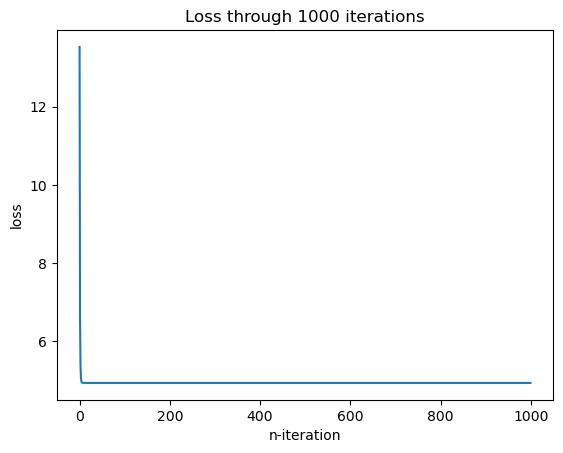

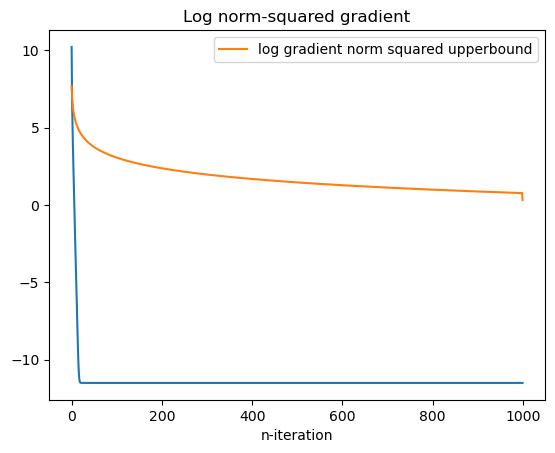

In [271]:
plt.plot(losses)
plt.title('Loss through 1000 iterations')
plt.xlabel('n-iteration')
plt.ylabel('loss')
plt.show()


plt.plot(log_norm_squared_gradient)
plt.plot(log_norm_squared_gradient_upper, label='log gradient norm squared upperbound')
plt.title('Log norm-squared gradient')
plt.legend()
plt.xlabel('n-iteration')
plt.show()

5.  Plot the data, as well as your optimized regression curve

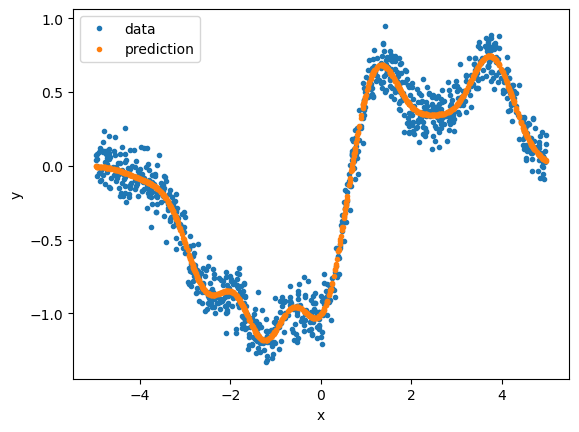

In [272]:
preds = np.matmul(Phi.T, w)[:, 0]
plt.plot(x, y, '.', label = 'data')
plt.plot(x, preds,'.', label = 'prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 2 Multi-Layer Perceptrons (MLP


(400, 3)